---
---

<h1><center><ins>Exercise Sheet 9</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 

**(B)** Discuss the results you obtained in point (A).

**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

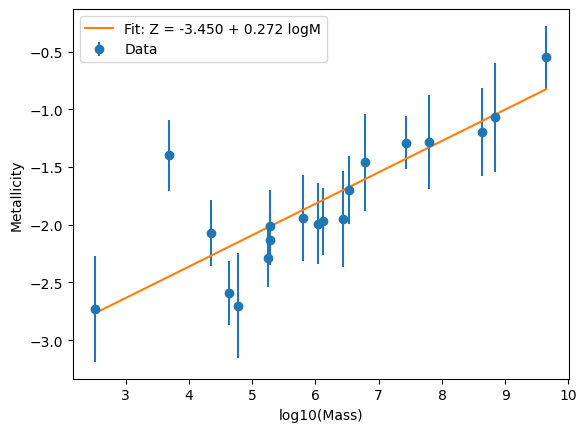

=== Weighted Linear Fit Results ===
Intercept a = -3.45029 ± 0.27170
Slope     b = 0.27205 ± 0.04321

Covariance matrix:
cov(a,a) = 7.38205e-02
cov(b,b) = 1.86673e-03
cov(a,b) = -1.13190e-02
Correlation coefficient r_ab = -0.964

Chi² = 19.93
Reduced Chi² = 1.17

=== Pearson correlation ===
r = 0.827 (p = 1.278e-05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# 1. Load data

logM, Z, err_logM, err_Z = np.loadtxt("mmr_lg.dat", unpack=True)

# We neglect the mass errors, so weights = 1/sigma_Z^2
weights = 1 / err_Z**2


# 2. Weighted linear regression: Z = a + b * logM
# Compute weighted averages
W = np.sum(weights)
x_bar = np.sum(weights * logM) / W
y_bar = np.sum(weights * Z) / W

# Compute best-fit slope b and intercept a
b = np.sum(weights * (logM - x_bar) * (Z - y_bar)) / np.sum(weights * (logM - x_bar)**2)
a = y_bar - b * x_bar


# 3. Parameter uncertainties and covariance matrix

# Variances
sigma_b2 = 1 / np.sum(weights * (logM - x_bar)**2)
sigma_a2 = sigma_b2 * np.sum(weights * logM**2) / W
cov_ab = -x_bar * sigma_b2

# Standard deviations
sigma_a = np.sqrt(sigma_a2)
sigma_b = np.sqrt(sigma_b2)

# Correlation coefficient between parameters a and b
r_ab = cov_ab / (sigma_a * sigma_b)


# 4. Goodness of fit: chi² and reduced chi²
Z_model = a + b*logM
chi2 = np.sum(((Z - Z_model) / err_Z)**2)
dof = len(logM) - 2
chi2_red = chi2 / dof


# 5. Pearson correlation coefficient r between logM and Z
r_pearson, p_value = pearsonr(logM, Z)


# 6. Plot
plt.errorbar(logM, Z, yerr=err_Z, fmt='o', label="Data")
xplot = np.linspace(min(logM), max(logM), 200)
plt.plot(xplot, a + b*xplot, label=f"Fit: Z = {a:.3f} + {b:.3f} logM")
plt.xlabel("log10(Mass)")
plt.ylabel("Metallicity")
plt.legend()
plt.show()


# 7. Print results

print("=== Weighted Linear Fit Results ===")
print(f"Intercept a = {a:.5f} ± {sigma_a:.5f}")
print(f"Slope     b = {b:.5f} ± {sigma_b:.5f}")
print()
print("Covariance matrix:")
print(f"cov(a,a) = {sigma_a2:.5e}")
print(f"cov(b,b) = {sigma_b2:.5e}")
print(f"cov(a,b) = {cov_ab:.5e}")
print(f"Correlation coefficient r_ab = {r_ab:.3f}")
print()
print(f"Chi² = {chi2:.2f}")
print(f"Reduced Chi² = {chi2_red:.2f}")
print()
print("=== Pearson correlation ===")
print(f"r = {r_pearson:.3f} (p = {p_value:.3e})")


# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?

**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?

**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

In [ ]:
# Import some useful packages

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

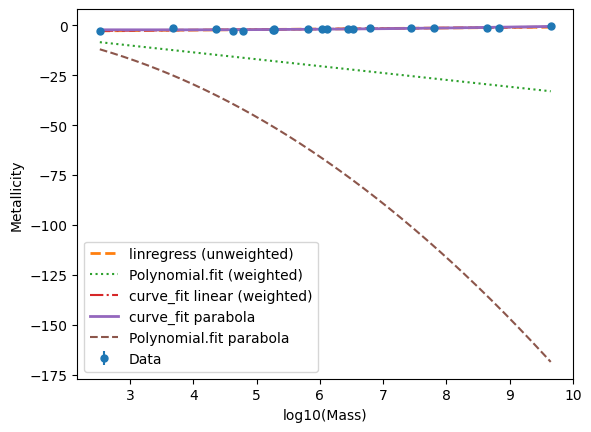


=== (C) Parabolic Fit — curve_fit ===
a = -1.7825 ± 0.8421
b = -0.2827 ± 0.2686
c = 0.0429 ± 0.0205
chi²_red = 0.972

=== (C) Parabolic Fit — Polynomial.fit ===
a = 0.0429,  b = -0.2827,  c = -1.7825
chi²_red = 78818.619
→ keine Parameter-Unsicherheiten verfügbar


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial


logM, Z, err_logM, err_Z = np.loadtxt("mmr_lg.dat", unpack=True)

# (B) 1. Linear Fit — linregress (unweighted)
lin = linregress(logM, Z)
a_lin = lin.intercept
b_lin = lin.slope
aerr_lin = lin.intercept_stderr
berr_lin = lin.stderr

Z_model_lin = a_lin + b_lin * logM
chi2_lin = np.sum(((Z - Z_model_lin) / err_Z)**2)
chi2red_lin = chi2_lin / (len(logM) - 2)


# (B) 2. Linear Fit — Polynomial.fit (weighted)
poly = Polynomial.fit(logM, Z, deg=1, w=1/err_Z)
c1, c0 = poly.convert().coef
a_poly, b_poly = c0, c1

Z_model_poly = a_poly + b_poly * logM
chi2_poly = np.sum(((Z - Z_model_poly) / err_Z)**2)
chi2red_poly = chi2_poly / (len(logM) - 2)


# (B) 3. Linear Fit — curve_fit (weighted)
def line(x, a, b):
    return a + b*x

popt, pcov = curve_fit(line, logM, Z, sigma=err_Z, absolute_sigma=True)
a_cf, b_cf = popt
aerr_cf, berr_cf = np.sqrt(np.diag(pcov))

Z_model_cf = line(logM, a_cf, b_cf)
chi2_cf = np.sum(((Z - Z_model_cf) / err_Z)**2)
chi2red_cf = chi2_cf / (len(logM) - 2)


# (C) Parabolic Fit — curve_fit
def parabola(x, a, b, c):
    return a + b*x + c*x**2

popt2, pcov2 = curve_fit(parabola, logM, Z, sigma=err_Z, absolute_sigma=True)
a2, b2, c2 = popt2
err_a2, err_b2, err_c2 = np.sqrt(np.diag(pcov2))

Z_model_parab_cf = parabola(logM, a2, b2, c2)

# chi² for parabolic fit
chi2_parab = np.sum(((Z - Z_model_parab_cf) / err_Z)**2)
chi2red_parab = chi2_parab / (len(logM) - 3)


# (C) Parabolic Fit — Polynomial.fit
poly2 = Polynomial.fit(logM, Z, deg=2, w=1/err_Z)
c2_quad, c1_quad, c0_quad = poly2.convert().coef  # c0 + c1 x + c2 x^2

Z_model_parab_poly = c0_quad + c1_quad*logM + c2_quad*logM**2

chi2_parab_poly = np.sum(((Z - Z_model_parab_poly) / err_Z)**2)
chi2red_parab_poly = chi2_parab_poly / (len(logM) - 3)


# Plot
plt.errorbar(logM, Z, yerr=err_Z, fmt='o', label="Data", markersize=5)

xplot = np.linspace(min(logM), max(logM), 500)

# Make linregress clearly visible (thicker dashed line)
plt.plot(xplot, a_lin + b_lin*xplot, 
         label="linregress (unweighted)", 
         linestyle='--', linewidth=2)

plt.plot(xplot, a_poly + b_poly*xplot, 
         label="Polynomial.fit (weighted)", 
         linestyle=':')

plt.plot(xplot, a_cf + b_cf*xplot, 
         label="curve_fit linear (weighted)", 
         linestyle='-.')

# Parabolas
plt.plot(xplot, parabola(xplot, a2, b2, c2),
         label="curve_fit parabola", linewidth=2)

plt.plot(xplot, c0_quad + c1_quad*xplot + c2_quad*xplot**2,
         label="Polynomial.fit parabola", linestyle='--')

plt.xlabel("log10(Mass)")
plt.ylabel("Metallicity")
plt.legend()
plt.show()

# Print results

print("\n=== (C) Parabolic Fit — curve_fit ===")
print(f"a = {a2:.4f} ± {err_a2:.4f}")
print(f"b = {b2:.4f} ± {err_b2:.4f}")
print(f"c = {c2:.4f} ± {err_c2:.4f}")
print(f"chi²_red = {chi2red_parab:.3f}")

print("\n=== (C) Parabolic Fit — Polynomial.fit ===")
print(f"a = {c0_quad:.4f},  b = {c1_quad:.4f},  c = {c2_quad:.4f}")
print(f"chi²_red = {chi2red_parab_poly:.3f}")
print("→ keine Parameter-Unsicherheiten verfügbar")


(A)

Numpy.polynomial.polynomial.Polynomial.Fit

(1) Wozu kann man diese Funktion nutzen?
Zum Fitten von Polynomen beliebiger Ordnung (Linear, Quadratisch, Kubisch, …).
Unterstützt Gewichtungen (w=), also Fehlerbalken in der y-Richtung.
Besonders gut geeignet für:
- lineare Regression
- quadratische oder höhere Polynome
- schnelle Vorversuche von Modellfunktionen

(2) Liefert die Funktion eine vollständige Beschreibung des Fits? Was fehlt?
Was sie liefert:
- Die best-fit-Koeffizienten des Polynoms
- Eine Repräsentation des Polynoms als Polynomial-Objekt

Was fehlt:
Keine Unsicherheiten der Parameter
Keine Kovarianzmatrix
Keine χ²-Werte oder Goodness-of-fit Information


scipy.stats.lineregress

(1) Wozu kann man diese Funktion nutzen?
- Für einfache lineare Regression
- Schnelles und unkompliziertes Fitten einer Geraden
- Nützlich, wenn man keine Fehlerbalken hat oder sie ignorieren möchte
- Da es ungewichtet ist, sollte es nicht für wissenschaftliche Fits mit Messfehlern benutzt werden

(2) Liefert die Funktion eine vollständige Beschreibung des Fits? Was fehlt?
Was sie liefert:
- Steigung b und Achsenabschnitt a
- Standardfehler von b und a
- Pearson-Korrelationskoeffizient r
- p-Wert und Standardfehler
- Einfachste mögliche lineare Regressionsdiagnostik

Was fehlt:
Keine Gewichtung möglich → Fehler auf y werden ignoriert
Keine Kovarianzmatrix der Parameter
Keine χ²-Berechnung
Nur für Geraden, nicht für andere Modellformen


scipy.optimize.curve_fit

1) Wozu kann man diese Funktion nutzen?
- Allgemeinste Fit-Methode in SciPy
- Zum Fitten beliebiger Modellfunktionen:
- Geraden
- Parabel
- Power-Law
- Exponentialfunktionen
- Physikalische Modelle
- Kann Fehler auf der y-Achse berücksichtigen (sigma=)
-Kann vollständige statistische Fit-Information liefern

(2) Liefert die Funktion eine vollständige Beschreibung des Fits? Was fehlt?
Was sie liefert:
- Best-Fit-Parameter
- Kovarianzmatrix der Parameter
Dadurch auch:
- Parameterunsicherheiten (Standardabweichungen)
- Parameterkorrelationen
- Möglichkeit, daraus χ² und reduced χ² selbst zu berechnen

Was fehlt:
curve_fit berechnet nicht automatisch χ² oder Goodness-of-Fit, das muss man selbst berechne
Es liefert nur Fehler für y-Werte, nicht für x-Werte
Regressionsdiagnostik (r-Wert, p-Wert) muss separat berechnet werden


# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry "*Bayesian inference problem, MCMC and variational inference*" that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the "Installation" section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

In [ ]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner

1. Was bedeutet jedes der Terme in Bayes’ Theorem?

Bedeutung der Begriffe:
Posterior 
P(θ∣D)
- Die Wahrscheinlichkeit für das Modell / die Parameter nachdem wir Daten gesehen haben.
- Das ist das, was wir herausfinden wollen.

Likelihood 
P(D∣θ)
- Wie gut erklären bestimmte Parameter die beobachteten Daten?

Prior 
P(θ)
- Was wir vor den Daten über die Parameter glauben (Vorwissen).

Evidence 
P(D)
- Normierungsfaktor; Wahrscheinlichkeit, die Daten überhaupt zu beobachten.
- Für Vergleich von Modellen, aber bei MCMC meist unwichtig.

2. Wenn wir keine Informationen über die Wahrscheinlichkeit eines Ereignisses haben – welche Verteilung nehmen wir als Prior?
→ Eine uninformative oder flache Prior.

Das bedeutet:
- jede Möglichkeit ist zu Beginn gleich wahrscheinlich
- man bringt kein Vorwissen ein
- typische Wahl: Uniform-Verteilung

3. Wenn wir neue Beobachtungen haben – wie bauen wir das in Bayesianische Statistik ein?

 Wir aktualisieren unseren Ansatz mithilfe von Bayes:
- der alte Posterior wird zum neuen Prior
- wird dann mit der Likelihood der neuen Daten kombiniert.

4. Was bedeutet MCMC? Was ist es?

MCMC = Markov Chain Monte Carlo
- ein Verfahren, um aus einer komplizierten Verteilung Zufallsstichproben zu erzeugen
- speziell, wenn die Verteilung analytisch nicht berechenbar ist
- die erzeugten Stichproben repräsentieren den Posterior

5. Was ist der Hauptzweck von MCMC, und wie hängt es mit Bayesianischer Inferenz zusammen?

Der Zweck:
den posterior P(θ∣D) P(θ∣D) zu approximieren, auch wenn er kompliziert oder hochdimensional ist.

Zusammenhang:
Bayesianische Statistik definiert, was der Posterior ist MCMC berechnet ihn numerisch

